# Economic Data Analysis in USA

In [1]:
import os
from dotenv import load_dotenv
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from fredapi import Fred
import time

In [2]:
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [3]:
# Load environment variables from .env into the current session
load_dotenv()

FRED_API_KEY = os.environ.get('FRED_API_KEY')

In [4]:
# Create FRED object
fred = Fred(api_key=FRED_API_KEY)

## Exploration of Economic Indicators

In [5]:
# Dictionary to store data for each indicator
indicator_data = {}

indicators = [
    'GDP',         # Gross Domestic Product
    'CPIAUCSL',    # Consumer Price Index - primary gauge of inflation
    'UNRATE',      # Unemployment Rate
    'INDPRO',      # Industrial Production
    'UMCSENT',     # University of Michigan Consumer Sentiment Index
    'GS10',        # 10-Year Treasury Constant Maturity Rate - long term benchmark on interest rates
    'SP500',       # S&P 500 Index
    'HOUST',       # Housing Starts - number of new residential construction projects
    'CIVPART',     # Civilian Labor Force Participation Rate
    'MORTGAGE30US' # Mortgage Rates
]

In [6]:
# Retrieve data for each indicator with the API
for indicator in indicators:
    try:
        data = fred.get_series(indicator)
        # Limit data to 2000 onwards
        indicator_data[indicator] = data[data.index >= '2000-01-01']
    except Exception as e:
        print(f"Error fetching data for {indicator}: {str(e)}")

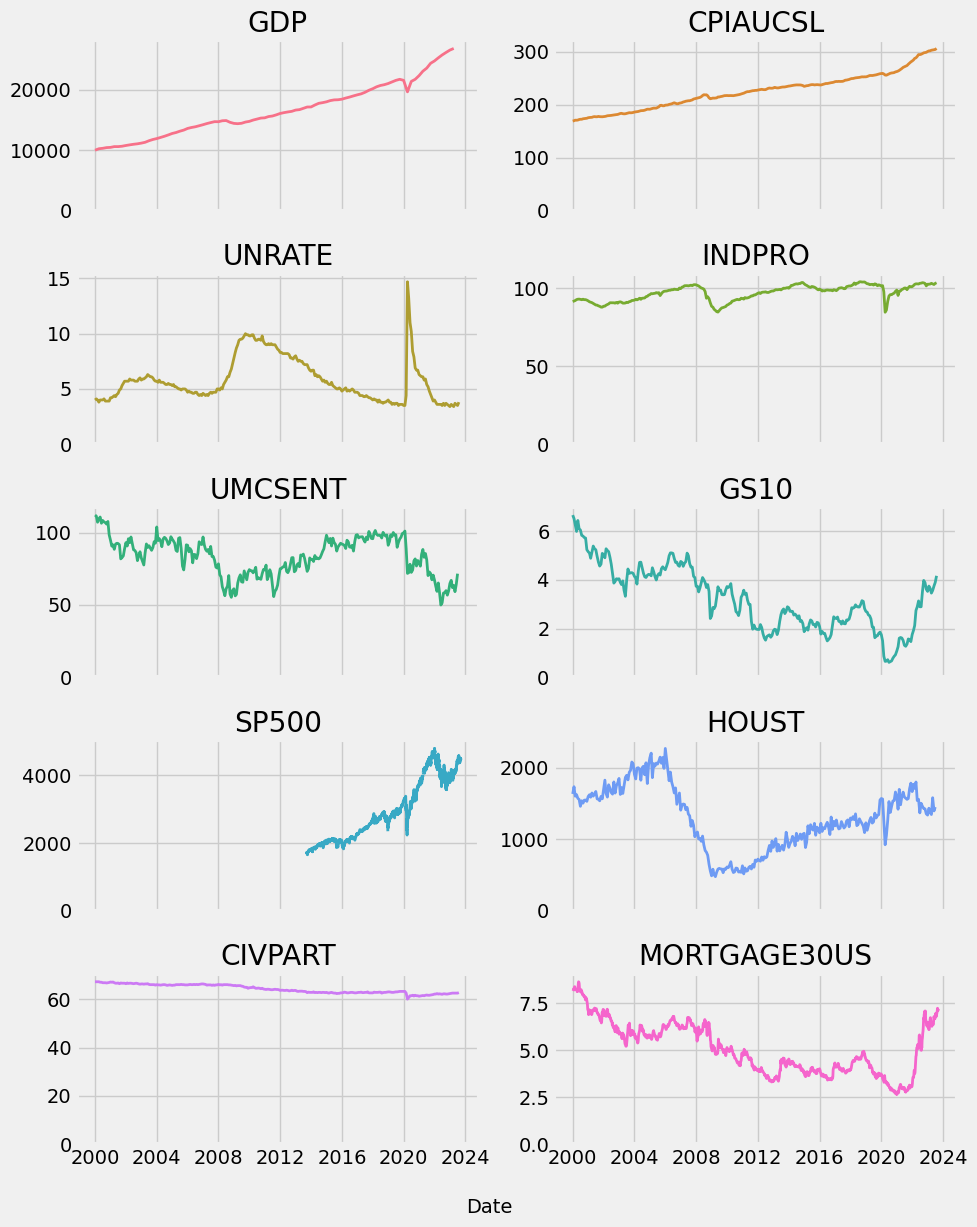

In [7]:
palette = sns.color_palette("husl", len(indicator_data))

num_rows = len(indicator_data) // 2 + (len(indicator_data) % 2 > 0)
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 12), sharex=True)
axes = axes.ravel()  # Flatten the 2D array of axes

for i, (indicator, data) in enumerate(indicator_data.items()):
    ax = axes[i]
    ax.plot(data.index, data.values, lw=2, color=palette[i], label=indicator)
    ax.set_title(indicator)
    ax.set_ylim(0, np.nanmax(data.values) * 1.05)
    ax.grid(True)

fig.text(0.5, -0.02, "Date", ha="center")

plt.tight_layout()

plt.savefig("images/economic_indicators_2000-2024.png", dpi=400, bbox_inches='tight')
plt.show()

## Unemployment Rates

### Unemployment Rates By State

In [8]:
# Load in FRED series IDs for state unemployment rates
with open(os.path.join('data', 'state_ur_series_ids.json'), 'r') as file:
    state_ur_series_ids = json.load(file)

In [9]:
states_unemployment_data = {}

for state, series_id in state_ur_series_ids.items():
    try:
        states_unemployment_data[state] = fred.get_series(series_id)
    except Exception as e:
        print(f"Error fetching data for {state}: {str(e)}")
    time.sleep(0.1)  # Not requesting too fast

In [10]:
# Make a dataframe from the unemployment data
states_unemployment_df = pd.concat(states_unemployment_data, axis=1)
states_unemployment_df.columns = states_unemployment_data.keys()

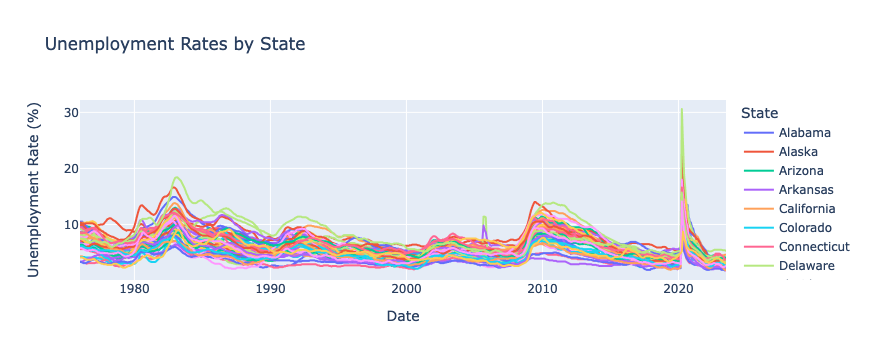

In [37]:
fig = px.line(
    states_unemployment_df,
    labels={"index": "Date", "value": "Unemployment Rate (%)"},
    title="Unemployment Rates by State"
)

fig.update_layout(legend_title_text="State")

fig.show()

### Unemployment Rate Map

## Housing Market Health

## S&P 500 and Stock Prices of Largest Companies